# Análise exploratória de dados

#### Importando bibliotecas

In [141]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path 

## 1. Descrição dos dados

In [143]:
# Trazendo o dicionário
data_path = Path('../data/external/dictionary.csv')

# Lendo o dataset
df_dictionary = pd.read_csv(data_path, sep=',') 

# Exibindo o DataFrame
df_dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Valor total da conta,quantitativa,contínua
1,tip,Gorjeta entregue ao garçom,quantitativa,contínua
2,sex,Gênero da pessoa pagante,qualitativa,nominal
3,smoker,Se o cliente é fumante ou não fumante,qualitativa,nominal
4,day,Dia da semana,qualitativa,cíclica
5,time,Se é almoço ou jantar,qualitativa,nominal
6,size,Tamanho do grupo de pessoas que frequentam o r...,quantitativa,discreta


#### Lendo o arquivo csv de tips

In [145]:
df= pd.read_csv("../data/raw/data.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Informações do dataset

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


* Não há nenhum campo nulo, ao todo são 244 linhas, 7 colunas e os tipos das variáveis estão corretos.

### Avaliando explicitamente se há brancos e nulos 

In [150]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

* Não foi verificado a presença de valores brancos e nulos

* Foi decidido manter os outliers pois eles são importantes nas análises a seguir. Não há erros referentes a gorjetas maiores que valor total, 

#### Verificando duplicatas

In [154]:
duplicados = df.duplicated()

# Exibindo as linhas duplicadas
linhas_duplicadas = df[duplicados]

# Mostrando o número de duplicados
num_duplicados = linhas_duplicadas.shape[0]

# Exibindo as informações
print(f"Número de linhas duplicadas: {num_duplicados}")
print(f"Linhas duplicadas: {linhas_duplicadas}")

Número de linhas duplicadas: 1
Linhas duplicadas:      total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2


* Foi verificado uma linha duplicada e será necessário remover a duplicada.

#### Removendo duplicada

In [157]:
df = df.drop_duplicates()

#### Traduzindo para português

In [159]:
df.replace({'Yes': 'Sim', 'No': 'Não'}, inplace=True)
df.replace({'Female': 'Mulher', 'Male': 'Homem'}, inplace=True)
df.replace({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur':'Quinta', 'Fri': 'Sexta'}, inplace=True)
df.replace({'Dinner': 'Jantar', 'Lunch': 'Almoço'}, inplace=True)

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Mulher,Não,Domingo,Jantar,2
1,10.34,1.66,Homem,Não,Domingo,Jantar,3
2,21.01,3.50,Homem,Não,Domingo,Jantar,3
3,23.68,3.31,Homem,Não,Domingo,Jantar,2
4,24.59,3.61,Mulher,Não,Domingo,Jantar,4


In [160]:
# Renomeando as colunas
df.rename(columns={
    'total_bill': 'valor_total',
    'tip': 'gorjeta',
    'sex': 'sexo',
    'smoker': 'fumante',
    'day': 'dia',
    'time': 'momento',
    'size': 'tamanho'
}, inplace=True)

# Exibir as primeiras linhas do DataFrame após renomear as colunas
df.head()


,valor_total,gorjeta,sexo,fumante,dia,momento,tamanho
0,16.99,1.01,Mulher,Não,Domingo,Jantar,2
1,10.34,1.66,Homem,Não,Domingo,Jantar,3
2,21.01,3.50,Homem,Não,Domingo,Jantar,3
3,23.68,3.31,Homem,Não,Domingo,Jantar,2
4,24.59,3.61,Mulher,Não,Domingo,Jantar,4


## 2. Perguntas de partida e hipóteses

* Qual é a frequência dos valores totais pagos e das gorjetas ?
* O tamanho do grupo influência os valores pagos?
* Quanto maior o valor total maior a gorjeta?
* Quais são os tamanhos de grupos mais frequentes no restaurante e quais dão mais gorjetas?
* Como é o comportamento desses grupos ao longo da semana?
* Neste Dataset qual o gênero que dá mais gorjetas?
* Nesse dataset são os fumantes ou não fumantes que dão mais gorjetas ?
* O hábito de fumar nos diferentes gêneros influênciam o valor da conta e gorjeta?
* As gorjetas ao longo dos dias são maiores para o almoço ou jantar?
* Será que os clientes pagam mais caros e dão gorjetas maiores dependendo do horário da refeição?
* Qual gênero é mais generoso com as gorjetas em relação ao momento da refeição?
* Quais fatores impactam mais nas gorjetas? <br>

## 3. Insights

### Análises descritivas 

#### Dados Categóricos

In [167]:
print("Tabela de características das variáveis qualitativas:\n")
df.describe(include=['object'])

Tabela de características das variáveis qualitativas:



,sexo,fumante,dia,momento
count,243,243,243,243
unique,2,2,4,2
top,Homem,Não,Sábado,Jantar
freq,157,151,87,176


##### 🟩 Observações: Dados categóricos
**sexo:** 157 clientes do sexo masculino e 87 clientes do sexo feminino.

**fumante:** 151 clientes desse restaurante não são fumantes, e 93 são fumantes.

**Dia:** Sábado é o dia mais frequentado no restaurante.

**momento:** Há uma concentração maior de clientes no jantar 176, contra 68 no almoço.

#### Dados Numéricos

In [170]:
print("Tabela de características das variáveis quantitativas:\n")
df.describe().round(2)

Tabela de características das variáveis quantitativas:



,valor_total,gorjeta,tamanho
count,243.00,243.00,243.00
mean,19.81,3.00,2.57
std,8.91,1.39,0.95
min,3.07,1.00,1.00
25%,13.38,2.00,2.00
50%,17.81,2.92,2.00
75%,24.17,3.58,3.00
max,50.81,10.00,6.00


#### Variância e Desvio Padrão

In [172]:
print(f"valor_total -> Variancia: ${df['valor_total'].var():.2f} e Desvio Padrão: ${df['valor_total'].std():.2f}.")
print(f"gorjeta-> Variancia: ${df['gorjeta'].var():.2f} e Desvio Padrão: ${df['gorjeta'].std():.2f}.")
print(f"tamanho -> Variancia: ${df['tamanho'].var():.2f} e Desvio Padrão: ${df['tamanho'].std():.2f}.")

valor_total -> Variancia: $79.39 e Desvio Padrão: $8.91.
gorjeta-> Variancia: $1.92 e Desvio Padrão: $1.39.
tamanho -> Variancia: $0.91 e Desvio Padrão: $0.95.


#### Interquartil

In [174]:
print(f"O IQR da conta é de {(df['valor_total'].quantile(q=0.75)) - (df['valor_total'].quantile(q=0.25)):.2f}.")
print(f"O IQR da gorgeta é de ${(df['gorjeta'].quantile(q=0.75))- (df['gorjeta'].quantile(q=0.25)):.2f}.")

O IQR da conta é de 10.79.
O IQR da gorgeta é de $1.58.


#### Frequencia de valor total e gorjetas 

* Qual é a frequência dos valores totais pagos e das gorjetas ? 

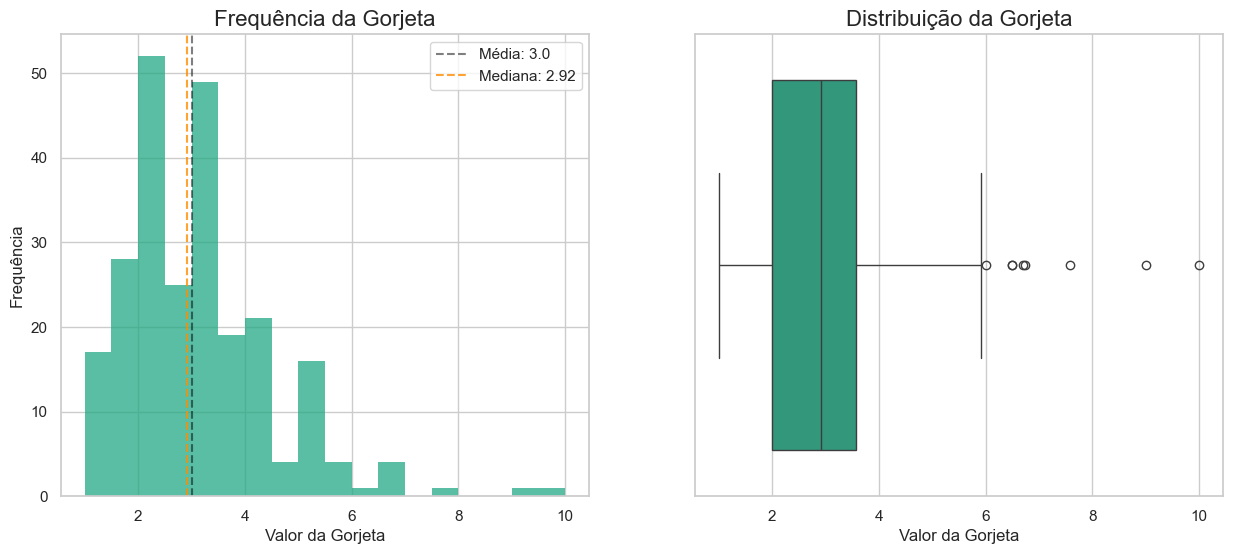

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

color_viridis = sns.color_palette("viridis", as_cmap=True)(0.6)

# Histograma 
sns.histplot(data=df, x='gorjeta', color=color_viridis, edgecolor='none', ax=axes[0])


axes[0].axvline(3.0, color='black', linestyle='--',alpha=0.5, label='Média: 3.0')
axes[0].axvline(2.92, color='darkorange', linestyle='--',alpha=0.8, label='Mediana: 2.92')


axes[0].legend()

# Boxplot 
sns.boxplot(data=df, x='gorjeta', color=color_viridis, ax=axes[1])


axes[0].set_title('Frequência da Gorjeta', fontsize=16)
axes[0].set_xlabel('Valor da Gorjeta', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)


axes[1].set_title('Distribuição da Gorjeta', fontsize=16)
axes[1].set_xlabel('Valor da Gorjeta', fontsize=12)



plt.show()

##### 🟩 Análise
Gráfico de histograma: Mostra a frequência dos valores das gorjeta onde a média é um pouco maior que a mediana, o que sugere uma leve assimetria à direita.A média nesse sentido pode está sendo afetada pelos valores da cauda à direita já que a maioria das gorjetas está na faixa de 2 a 4. No gráfico de boxplot à direita conseguimos observar que existem pontos mais à direita, que representam gorjetas acima do valor típico. Esses outliers indicam gorjetas significativamente altas. Os quartis está concentrados entre aproximadamente 2 e 4, o que confirma que a maioria das gorjetas está nessa faixa.

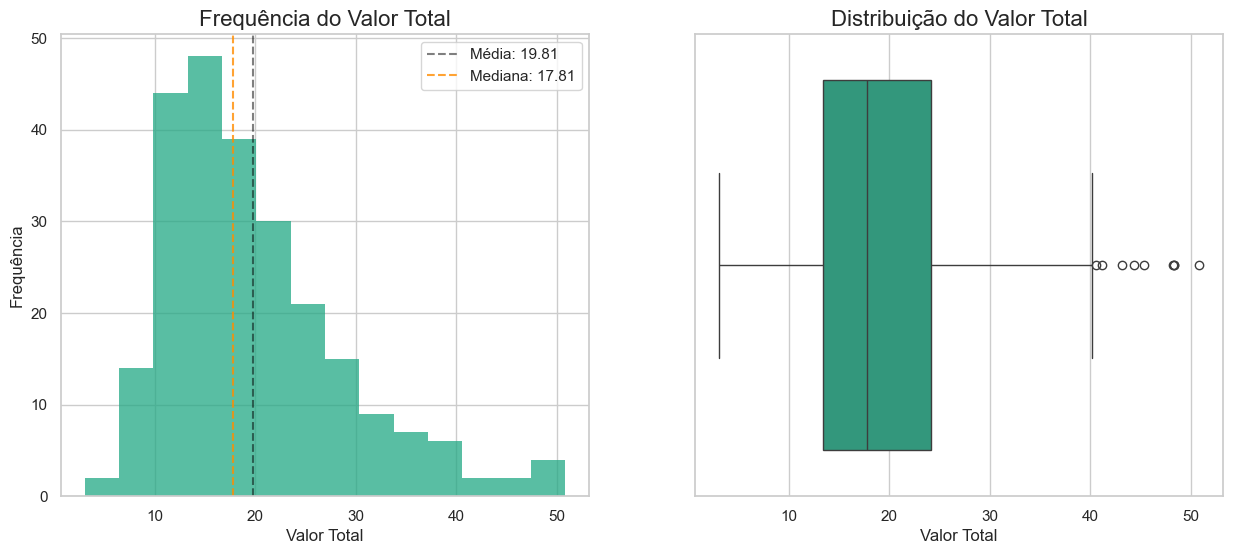

In [179]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


color_viridis = sns.color_palette("viridis", as_cmap=True)(0.6) 

# Histograma 
sns.histplot(data=df, x='valor_total', color=color_viridis, edgecolor='none', ax=axes[0])


axes[0].axvline(19.81, color='black', linestyle='--',alpha=0.5, label='Média: 19.81')
axes[0].axvline(17.81, color='darkorange', linestyle='--',alpha=0.8, label='Mediana: 17.81')


axes[0].legend()

# Boxplot 
sns.boxplot(data=df, x='valor_total', color=color_viridis, ax=axes[1])


axes[0].set_title('Frequência do Valor Total', fontsize=16)
axes[0].set_xlabel('Valor Total', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)


axes[1].set_title('Distribuição do Valor Total', fontsize=16)
axes[1].set_xlabel('Valor Total', fontsize=12)


plt.show()


##### 🟩Análise
O gráfico de histograma do valor total indica uma distribuição assimetria à direita. A maioria dos valores se concentra em torno da média, com uma cauda mais longa para valores mais altos. Aqui novamente a média é ligeiramente maio que a mediana, cerca de dois dólares de diferença e pode está sendo influenciada por valores mais altos à direita. A maior parte dos dados se concentra entre 10 e 30 dólares. No gráfico de boxplot do valor total os pontos isolados acima de Q3 representam os outliers, ou seja, valores que estão muito distantes dos demais. O boxplot confirma a informação do histograma sobre a mediana e a dispersão dos dados. A presença de outliers indica que existem alguns valores muito altos em relação à maioria dos dados.

#### Relação entre Gorjeta e Valores totais pagos pelos clientes

* O tamanho do grupo influência os valores pagos? E quanto maior o valor total maior a gorjeta?

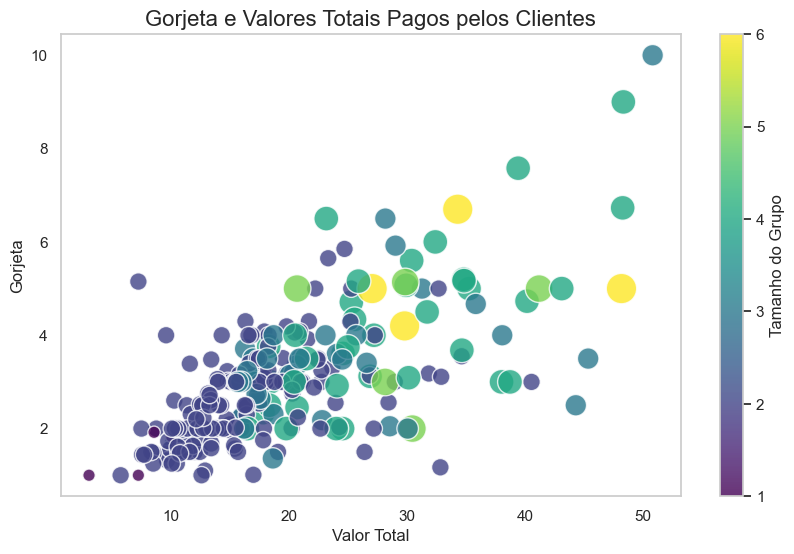

In [182]:
plt.figure(figsize=(10, 6))

# Criando o gráfico de dispersão 
scatter = plt.scatter(df['valor_total'], df['gorjeta'], c=df['tamanho'], cmap='viridis', 
                      s=df['tamanho'] * 80, edgecolor='white', alpha=0.8)  # Ajuste o fator multiplicativo conforme necessário


plt.colorbar(scatter, label='Tamanho do Grupo')


plt.title('Gorjeta e Valores Totais Pagos pelos Clientes', fontsize=16)  # Usar plt.title() aqui
plt.xlabel('Valor Total')
plt.ylabel('Gorjeta')
plt.grid()

plt.show()

##### 🟩 Análise: 

Observando o gráfico de dispersão para as três variáveis testadas, não há uma correlação muito clara entre o tamanho do grupo e o valor total. Podemos observar que os grupos com menos pessoas tendem a pagar preços menores no valor total e nas gorjetas porém há muitos valores dispersos informando que grupos com menos pessoas também costumam gastar mais no restaurante. Já em relação ao valor total e da gorjeta a tendência é que, à medida que o valor total da conta aumenta, a gorjeta também tende a aumentar sendo uma correlação positiva entre essas duas variáveis. No entanto, a relação não é perfeita, por conta dos pontos fora da tendência geral.

#### Tamanho do grupo mais frequente e valores de gorjetas 
* Quais são os tamanhos de grupos mais frequentes no restaurante e quais dão mais gorjetas?

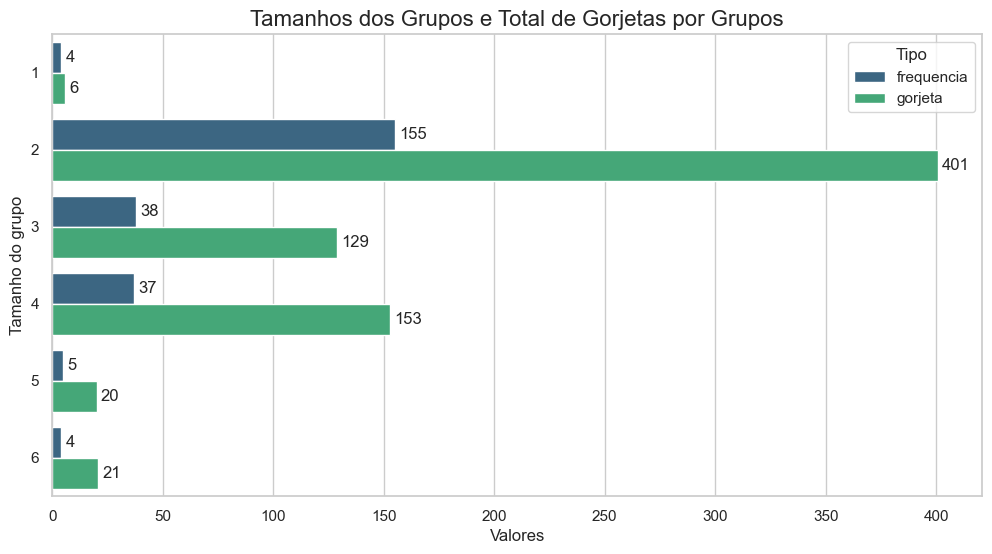

In [185]:
frequencias = df['tamanho'].value_counts().sort_index()

soma_gorjetas = df.groupby('tamanho')['gorjeta'].sum().reindex(frequencias.index, fill_value=0)


grafico_df = pd.DataFrame({
    'tamanho': frequencias.index,
    'frequencia': frequencias.values,
    'gorjeta': soma_gorjetas
})


grafico_long = grafico_df.melt(id_vars='tamanho', value_vars=['frequencia', 'gorjeta'], 
                               var_name='Tipo', value_name='Valor')


plt.figure(figsize=(12, 6))
ax = sns.barplot(y='tamanho', x='Valor', hue='Tipo', data=grafico_long, palette='viridis', orient='h')


plt.ylabel('Tamanho do grupo', fontsize=12)
plt.xlabel('Valores', fontsize=12)
plt.legend(title='Tipo')


plt.title('Tamanhos dos Grupos e Total de Gorjetas por Grupos', fontsize=16) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3) 


plt.show()

##### 🟩 Análise:
Nesse gráfico de barras o grupo de 2 pessoas domina: tanto em termos de frequência quanto de valor total das gorjetas. Grupos de 3 e 4 pessoas são bem semelhantes em tamanho porém em contribuição os grupos com 4 pessoas foram mais generosos com as gorjetas

### Tamanho dos grupos por dia de semana 
* Como é o comportamento desses grupos ao longo da semana? 

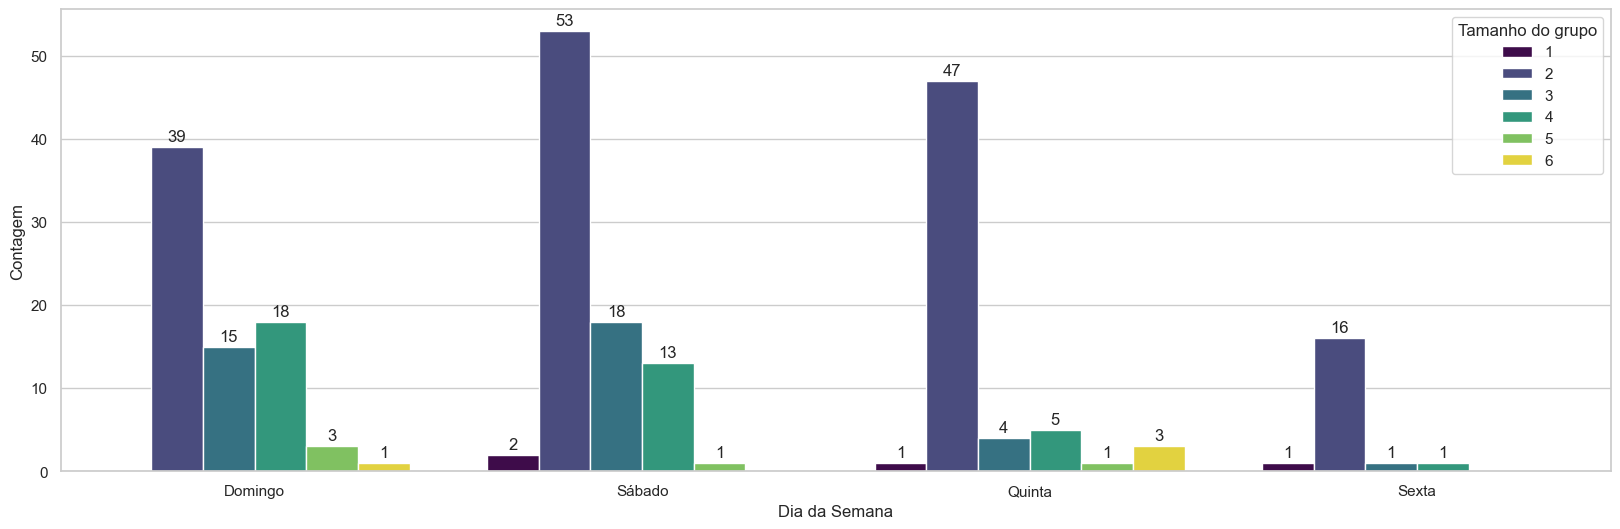

In [188]:
fig, ax = plt.subplots(figsize=(20, 6)) 

sns.countplot(x="dia", hue="tamanho", data=df, ax=ax, order=df['dia'].unique(), palette="viridis")
ax.set_xlabel("Dia da Semana", fontsize=12)
ax.set_ylabel("Contagem", fontsize=12)
ax.legend(title="Tamanho do grupo")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=2)

plt.show()


##### 🟩 Análise: 
O gráfico apresentado mostra a frequência de diferentes tamanhos de grupos de clientes em um restaurante ao longo da semana.O tamanho dos grupos varia significativamente ao longo da semana, com grupos maiores predominando nos fins de semana e grupos menores durante a semana. Nos dias de domingo e sábado, é posível observa uma maior frequência de grupos maiores (com 4 ou mais pessoas). Isso sugere que os fins de semana são mais populares para encontros em grupos maiores, como famílias, amigos e outros. Já na quinta e sexta a frequência de grupos menores (2 ou 3 pessoas) é mais alta. Isso pode indicar que durante a semana, as pessoas tendem a visitar o restaurante em grupos menores, possivelmente para refeições a dois ou encontros de negócios. 

#### Sobre o gênero pagante de gorjeta
* Neste Dataset qual o gênero que dá mais gorjetas?

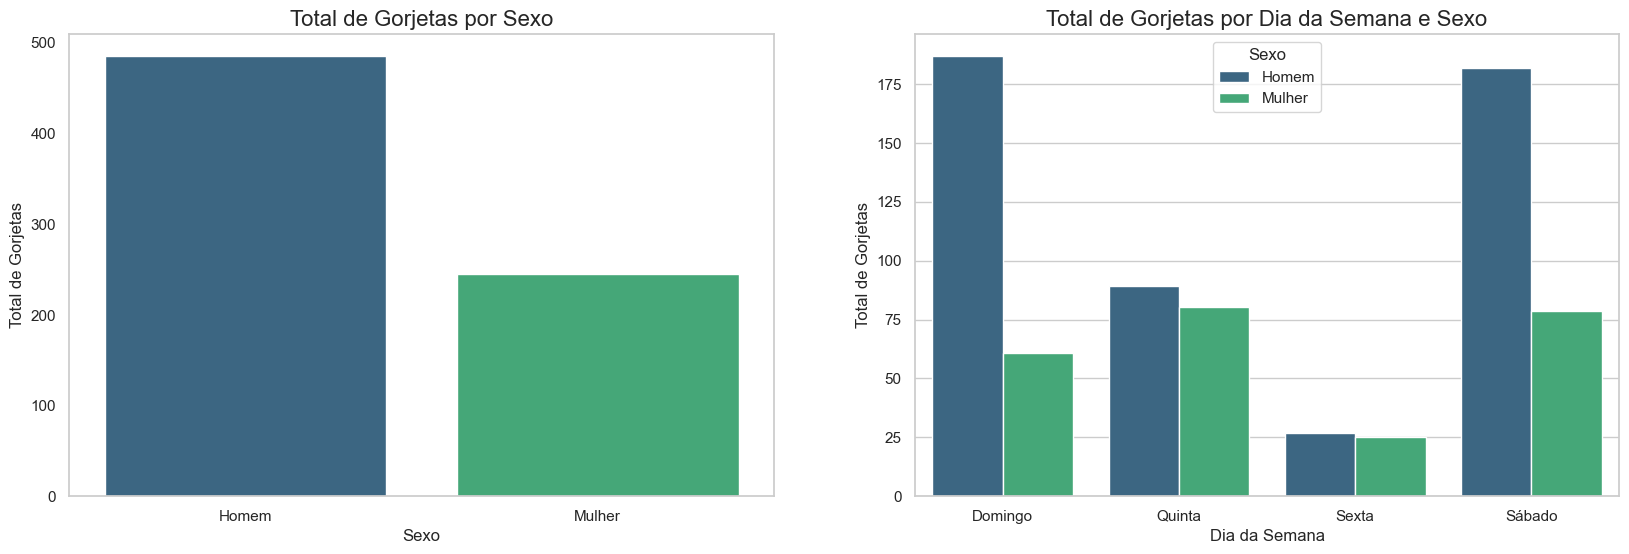

In [191]:
gorjetas_por_sexo = df.groupby('sexo')['gorjeta'].sum().reset_index()


gorjetas_por_dia_sexo = df.groupby(['dia', 'sexo'])['gorjeta'].sum().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(20, 6))


color_mapping = ['#1f77b4', '#2ca02c']  

sns.barplot(x='sexo', y='gorjeta', data=gorjetas_por_sexo, hue='sexo', palette='viridis', ax=axes[0], legend=False)

axes[0].set_xlabel('Sexo', fontsize=12)
axes[0].set_ylabel('Total de Gorjetas', fontsize=12)
axes[0].set_title('Total de Gorjetas por Sexo', fontsize=16)
axes[0].grid(False)


sns.barplot(x='dia', y='gorjeta', hue='sexo', data=gorjetas_por_dia_sexo, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Dia da Semana', fontsize=12)
axes[1].set_ylabel('Total de Gorjetas', fontsize=12)
axes[1].set_title('Total de Gorjetas por Dia da Semana e Sexo', fontsize=16)
axes[1].legend(title='Sexo')


plt.show()

##### 🟩Análise:

O gráfico à esquerda indica que, em geral, os homens deixam um valor total de gorjetas maior em comparação com as mulheres. Isso pode está ligado as diferenças nos hábitos, expectativas culturais e sociais que podem influenciar o comportamento de homens e mulheres em relação a gorjetas.No gráfico de barras à direita o valor total das gorjetas varia consideravelmente na semana, tanto para homens quanto para mulheres. A diferença entre os homens e as mulheres em relação ao valor total das gorjetas é mais evidente nos fins de semana, sugerindo que os homens podem ser mais propensos a deixar gorjetas maiores em ocasiões especiais, encontros familiares e etc.... Em contrapartida Os valores das gorjetas tendem a ser menores nos dias úteis, o que pode ser explicado por um perfil de cliente diferente, com menor gasto médio por pessoa. Valores de gorjetas em quase igualdade entre os sexos é observado nos dias de quinta e sexta.

#### Hábitos dos clientes 
* Nesse dataset são os fumantes ou não fumantes que dão mais gorjetas ?

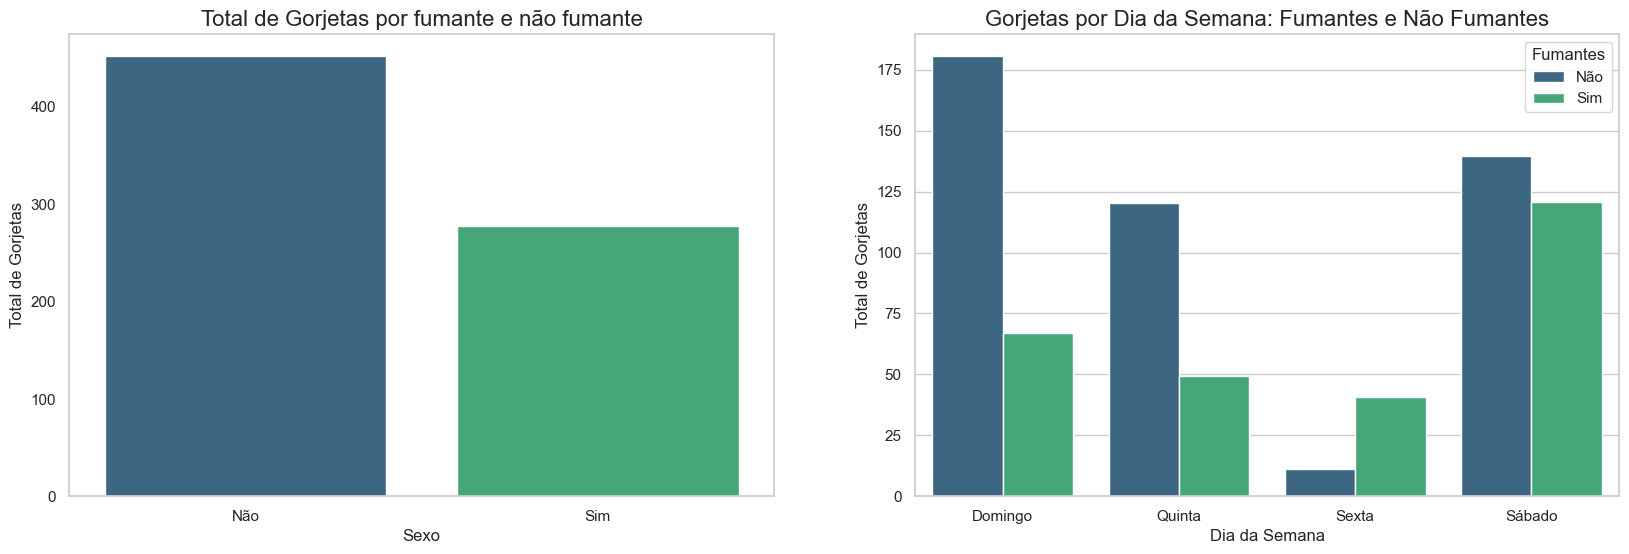

In [194]:
gorjetas_por_sexo = df.groupby('fumante')['gorjeta'].sum().reset_index()


gorjetas_por_dia_sexo = df.groupby(['dia', 'fumante'])['gorjeta'].sum().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(20, 6))


color_mapping = ['#1f77b4', '#2ca02c'] 


sns.barplot(x='fumante', y='gorjeta', data=gorjetas_por_sexo, hue='fumante', palette='viridis', ax=axes[0], legend=False)

axes[0].set_xlabel('Sexo', fontsize=12)
axes[0].set_ylabel('Total de Gorjetas', fontsize=12)
axes[0].set_title('Total de Gorjetas por fumante e não fumante', fontsize=16)
axes[0].grid(False)


sns.barplot(x='dia', y='gorjeta', hue='fumante', data=gorjetas_por_dia_sexo, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Dia da Semana', fontsize=12)
axes[1].set_ylabel('Total de Gorjetas', fontsize=12)
axes[1].set_title('Gorjetas por Dia da Semana: Fumantes e Não Fumantes', fontsize=16)
axes[1].legend(title='Fumantes')


plt.show()


##### 🟩Análise:
O gráfico à esquerda indica que, em geral, os clientes que não fumam deixam um valor total de gorjetas maior em comparação com os fumantes. O valor total das gorjetas varia consideravelmente entre os dias da semana, tanto para fumantes quanto para não fumantes.
Nos fins de semana tanto fumantes quanto não fumantes tendem a deixar gorjetas maiores, o que pode estar relacionado a maior quantidade de clientes, celebração, encontros de grupos maiores. Os valores das gorjetas tendem a ser menores nos dias úteis, o que pode ser explicado por um perfil de cliente diferente, com menor gasto médio por pessoa. A diferença entre fumantes e não fumantes em relação ao valor total das gorjetas é mais evidente nos fins de semana, sugerindo que os não fumantes podem ser mais propensos a deixar gorjetas maiores em ocasiões especiais. A sexta com gorjetas maiores para fumantes mostra que nesse dia o restaurante foi mais frequentado por clientes com esse perfil.

#### Análise da Gorjeta e Valor da Conta pelo hábito dos gêneros 
* O hábito de fumar nos diferentes gêneros influênciam o valor da conta e gorjeta?

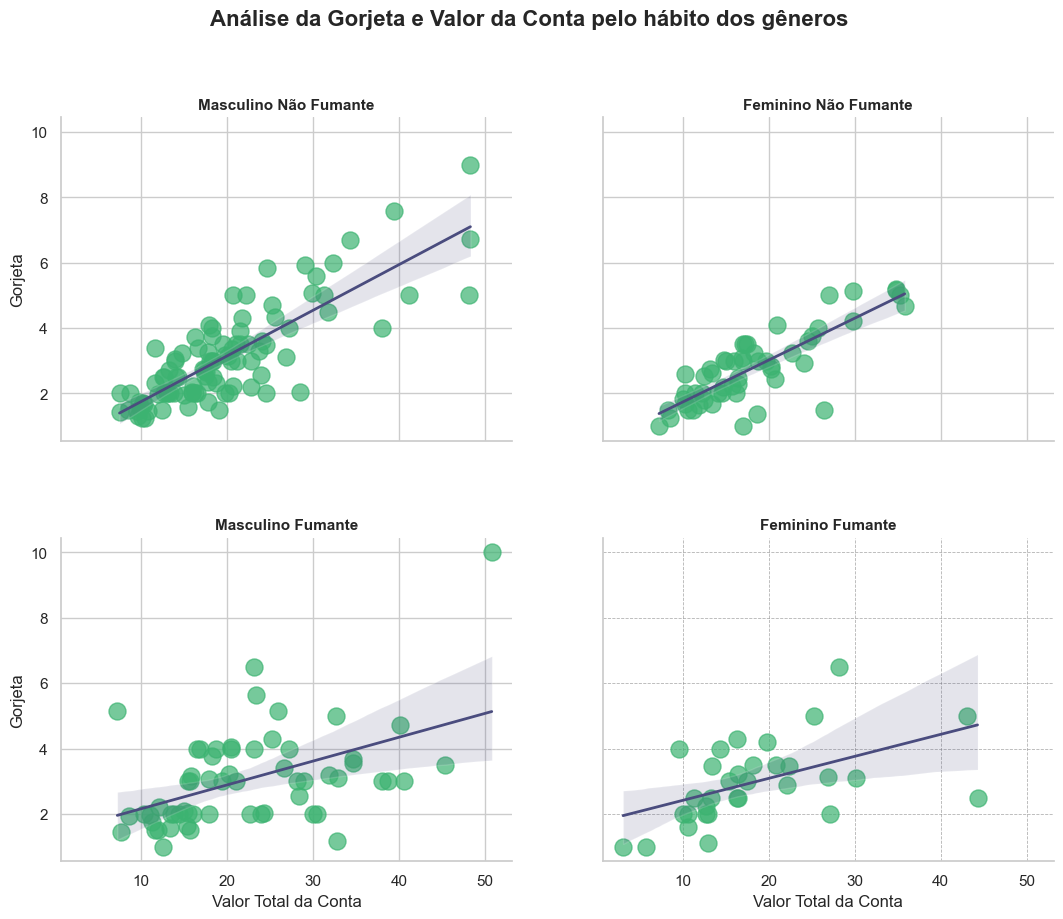

In [197]:
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Criação do gráfico lmplot
g = sns.lmplot(
    x="valor_total", 
    y="gorjeta", 
    col="sexo", 
    row="fumante", 
    data=df,
    height=4.5, 
    aspect=1.2, 
    ci=95,  # Intervalo de confiança para a regressão
    scatter_kws={'s': 150, 'alpha': 0.7, 'color': 'mediumseagreen'},  # Configurações dos pontos
    line_kws={'color': '#4a4c7e', 'linewidth': 2},  # Configurações da linha de regressão
    col_order=["Homem", "Mulher"],  
    row_order=["Não", "Sim"]
)

g.fig.suptitle("Análise da Gorjeta e Valor da Conta pelo hábito dos gêneros ", fontsize=16, weight='bold', y=1.02)
g.set_axis_labels("Valor Total da Conta", "Gorjeta", fontsize=12)

for ax, title in zip(g.axes.flat, ['Masculino Não Fumante', 'Feminino Não Fumante', 'Masculino Fumante', 'Feminino Fumante']):
    ax.set_title(title, fontsize=11, weight='bold') 

plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.6)
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.2)
plt.show()

##### 🟩Análise
O valor total da conta parece ser o fator que mais influencia o valor da gorjeta, independentemente do sexo ou do hábito de fumar. Embora existam pequenas diferenças entre os grupos, a relação geral entre o valor da conta e a gorjeta é bastante similar para todos os grupos analisados.
A relação do valor da conta e gorjeta é positiva, isso significa que, à medida que o valor da conta aumenta, o valor da gorjeta também tende a aumentar, como observado anteriormente e isso é independentemente do sexo ou do hábito de fumar como é mostrado nos gráficos acima. Quando olhamos para as linhas de regressão observamos que os homens não fumantes apresentam uma relação linear clara entre o valor da conta e a gorjeta, com uma leve tendência de aumento da gorjeta proporcional ao aumento do valor da conta. Para as mulheres não fumantes a relação é similar à dos homens não fumantes, com uma pequena tendência de aumento da gorjeta com o aumento do valor da conta. Quando olhamos para os homens fumantes e mulheres fumantes a relação é um pouco mais dispersa, mas a tendência geral é a mesma: quanto maior o valor da conta, maior a tendência de deixar uma gorjeta maior.

#### Comparação da gorjeta dada por refeições ao longo da semana
* As gorjetas ao longo dos dias são maiores para o almoço ou jantar?

<Figure size 1200x600 with 0 Axes>

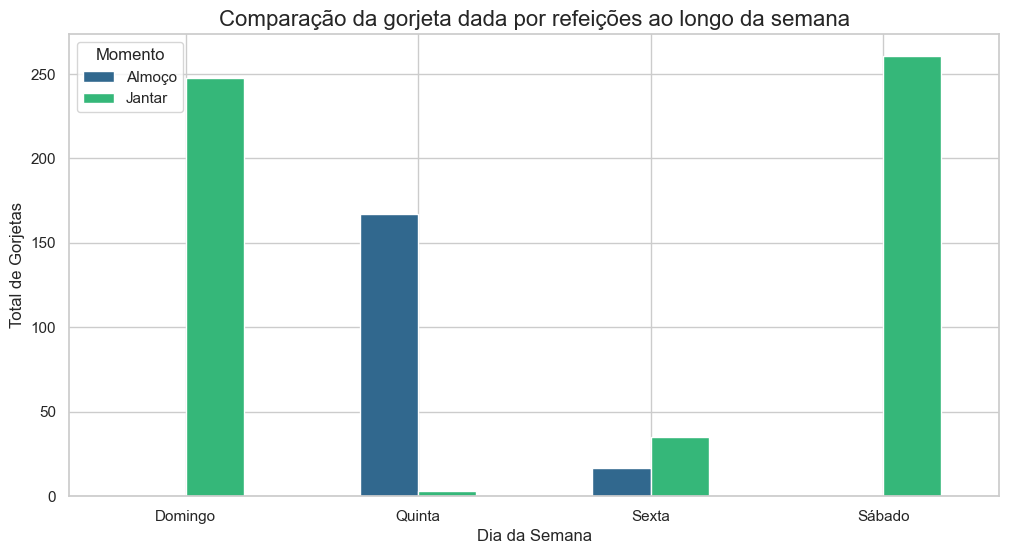

In [200]:
gorjetas_por_dia_momento = df.groupby(['dia', 'momento'])['gorjeta'].sum().unstack().fillna(0)


plt.figure(figsize=(12, 6))
gorjetas_por_dia_momento.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('viridis', n_colors=2))

plt.title('Comparação da gorjeta dada por refeições ao longo da semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Gorjetas', fontsize=12)
plt.xticks(rotation=0)

plt.legend(title='Momento')



plt.show()


##### 🟩 Análise:

No gráfico em barra é possível verificar que o valor total das gorjetas é significativamente maior nos jantares de domingo e sábado, provavelmente porque nesses dias o restaurante só abra a noite. Os almoços de quinta e sexta apresentam valores de gorjeta. Isso pode indicar que durante a semana, o restaurante abre nos dois expedientes porém as gorjetas são menores.

#### Verificando os valores únicos para as refeições e os dias da semana

In [203]:
valores_unicos_jantar = df[df['momento'] == 'Jantar']['dia'].unique()
print("Valores únicos para jantar:", valores_unicos_jantar)

Valores únicos para jantar: ['Domingo' 'Sábado' 'Sexta' 'Quinta']


In [204]:
valores_unicos_almoco = df[df['momento'] == 'Almoço']['dia'].unique()
print("Valores únicos para o almoço:", valores_unicos_almoco)

Valores únicos para o almoço: ['Quinta' 'Sexta']


##### 🟩Análise:
Como observado a modalidade almoço não esta presente nos finais de semana onde as arrecadações de gorjetas são bem maiores e exclusivas para a modalidade jantar.

#### Relação entre o total da conta, gorjetas e o momento da refeição
* Será que os clientes pagam mais caros e dão gorjetas maiores dependendo do horário da refeição?

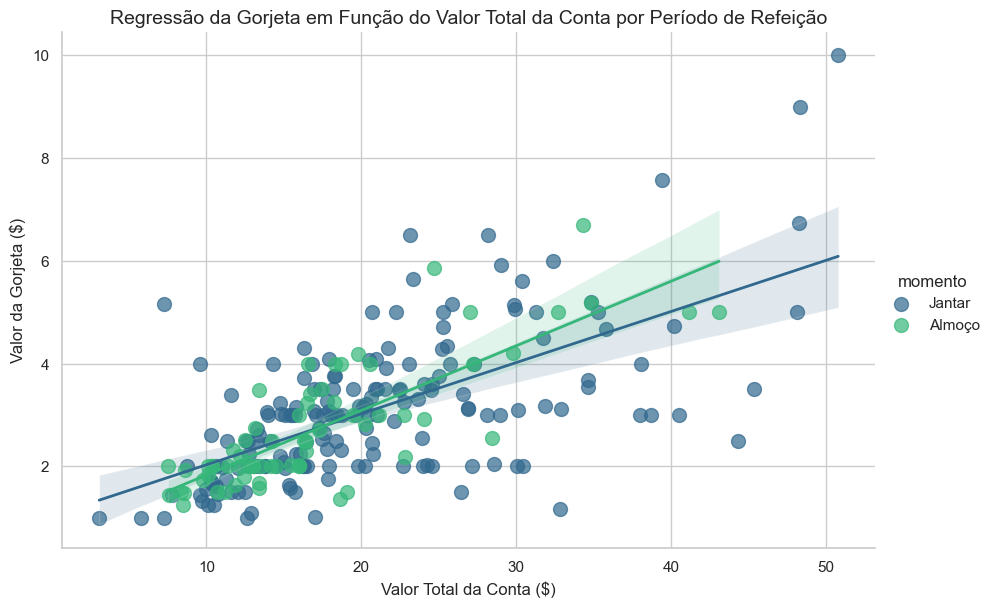

In [207]:
sns.lmplot(x='valor_total', y='gorjeta', data=df, hue='momento', 
           palette='viridis', aspect=1.5, height=6, 
           scatter_kws={'s': 100, 'alpha': 0.7},  
           line_kws={'linewidth': 2})          


plt.title('Regressão da Gorjeta em Função do Valor Total da Conta por Período de Refeição', fontsize=14)
plt.xlabel('Valor Total da Conta ($)', fontsize=12)
plt.ylabel('Valor da Gorjeta ($)', fontsize=12)
plt.grid(True)

plt.show()


##### 🟩 Análise:
O gráfico de dispersão apresenta uma relação entre o valor total da conta e o valor da gorjeta, com uma distinção entre almoços e jantares. As linhas de regressão (aquelas que tentam traçar a tendência geral dos dados) indicam que, à medida que o valor da conta aumenta, o valor da gorjeta também tende a aumentar, tanto para almoços quanto para jantares.Tanto para almoços quanto para jantares, existe uma correlação positiva entre o valor da conta e o valor da gorjeta. Isso significa que, em média, quanto maior a conta, maior tende a ser a gorjeta.
A linha de regressão para os jantares apresenta uma inclinação um pouco maior do que a linha de regressão para os almoços. Isso sugere que, nos janteres para valor da conta e gorjeta tende a ser um pouco maior do que nos almoços. No entanto, a diferença não é muito grande e há uma grande sobreposição entre os dados dos dois grupos. 

#### A relação da refeição e do gênero em relação à gorjeta
* Qual gênero é mais generoso com as gorjetas em relação ao momento da refeição?

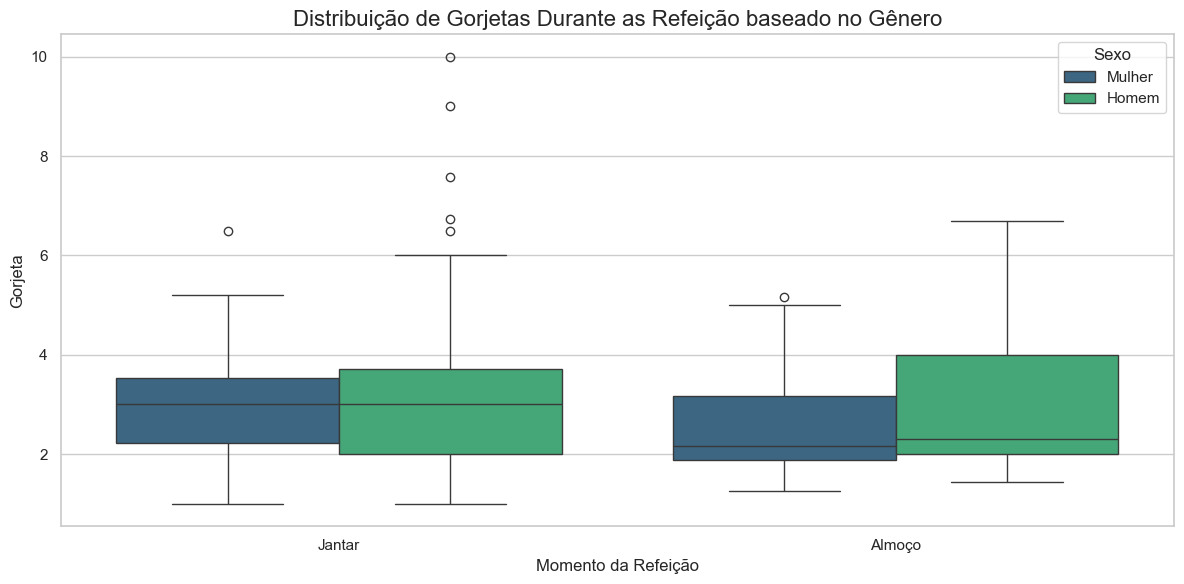

In [210]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='momento', y='gorjeta', hue='sexo', data=df, palette='viridis')

plt.title('Distribuição de Gorjetas Durante as Refeição baseado no Gênero', fontsize=16)
plt.xlabel('Momento da Refeição', fontsize=12)
plt.ylabel('Gorjeta', fontsize=12)

plt.legend(title='Sexo')

plt.tight_layout()

plt.show()

##### 🟩 Análise

Tanto homens quanto mulheres tendem a deixar valores de gorjeta semelhantes, com a mediana (linha central da caixa) se encontrando em torno de 3,5 a 4 dólares. As caixas são um pouco mais altas para o jantar, indicando que, em geral, as gorjetas tendem a ser, como observado anteriormente, um pouco maiores durante o jantar, independentemente do sexo. A altura das caixas e dos valores mínimos e máximos, indicam uma diversidade nos valores de gorjeta. A maior dispersão dos dados é para o jantar, especialmente para as mulheres, onde há alguns valores de gorjeta significativamente maiores quando comparado com o horário de almoço para o mesmo sexo. Há alguns outliers de valores de gorjeta mais altos, principalmente para o jantar. De forma geral, não há uma diferença significativa entre homens e mulheres em relação ao valor das gorjetas. Porém existe a leve tendência de gorjetas maiores durante o jantar.

#### Verificando correlação entre variáveis

* Quais fatores impactam mais nas gorjetas? <br>
✨ É importante converter valores de interesse do tipo categórico para númerico para que possa ser testado na correlação

In [214]:
df.replace({'Sim':'1', 'Não':'2'}, inplace=True)
df.replace({'Mulher':'1', 'Homem':'2'}, inplace=True)
df.replace({'Domingo':'1', 'Sábado':'2', 'Quinta':'3', 'Sexta':4}, inplace=True)
df.replace({'Jantar':'1', 'Almoço':'2'}, inplace=True)

df.head()

,valor_total,gorjeta,sexo,fumante,dia,momento,tamanho
0,16.99,1.01,1,2,1,1,2
1,10.34,1.66,2,2,1,1,3
2,21.01,3.50,2,2,1,1,3
3,23.68,3.31,2,2,1,1,2
4,24.59,3.61,1,2,1,1,4


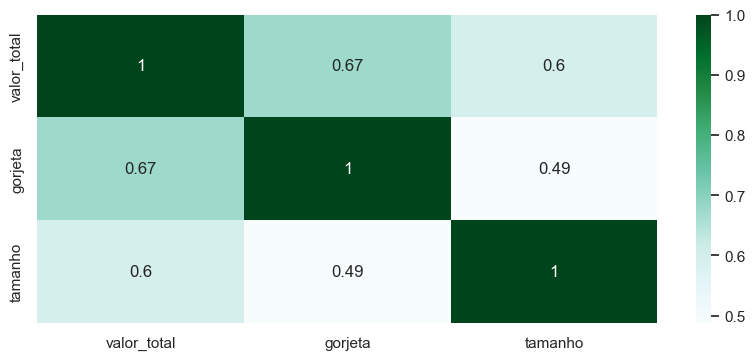

In [215]:
# Calcula a matriz de correlação
corr = df.corr(numeric_only=True)
features = corr.index

# Cria o gráfico de calor
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='BuGn')
plt.show()

##### 🟩Análise:
Olhando a gorjeta que é a minha variável resposta eu consigo visualizar duas correlações positivas e fortes. Gorjeta/valor total (0.68) o que representa que geralmente quanto maior o valor da conta, maior a gorjeta. A segunda correlação está em gorjeta/ tamanho (0.49) não é tão grande mas também relaciona a quantidade de grupos à gorjeta que nesse caso é maior quando estão em casal.Correlações negativas foram encontradas em gorjeta/dia(-0.14) e gorjeta/momento(-0.12) ambos influênciam negativamente a gorjeta uma vez que dia e momento tem uma relação positiva (0.67) e que dependendo do dia e do momento da refeição, as gorjetas podems er menores ou maiores   

#### Identificação de Outliers

In [246]:
# Calculando os limites para 'valor_total' usando IQR
Q1 = df['valor_total'].quantile(0.25)
Q3 = df['valor_total'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers = df[(df['valor_total'] < limite_inferior) | (df['valor_total'] > limite_superior)]
print("Outliers:")
print(outliers)

Outliers:
     valor_total  gorjeta sexo fumante dia momento  tamanho
59         48.27     6.73    2       2   2       1        4
102        44.30     2.50    1       1   2       1        3
142        41.19     5.00    2       2   3       2        5
156        48.17     5.00    2       2   1       1        6
170        50.81    10.00    2       1   2       1        3
182        45.35     3.50    2       1   1       1        3
184        40.55     3.00    2       1   1       1        2
197        43.11     5.00    1       1   3       2        4
212        48.33     9.00    2       2   2       1        4


In [ ]:
* Foi preferivel manter os outliers identificados acima pois eles contribuem para as analises e também não apres